In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pmdarima as pm
from sklearn.model_selection import train_test_split

In [15]:
# Load data
data = pd.read_parquet("Data/DSB_BDK_trainingset.parquet").reset_index()

In [16]:
# Interesting features
features_high = ['togpunktlighed', 'dsb_opformeringer', 'dsb_nedformeringer', 'dsb_open_errors_a', 'dsb_open_errors_b', 'dsb_open_errors_c', 'dsb_open_errors_d', 'dsb_antal_72_timer_foer', 'dsb_antal_i_alt','dsb_antal_paa_dagen', 'dsb_antal_uberoert', 'dsb_lkf_number_of_changes', 'dsb_event_count', 'dsb_0_1', 'dsb_tgf_sygdom', 'dsb_lkf_sygdom', 'dsb_lkf_relative_sygdom', 'dsb_fravaer', 'dsb_relative_fravaer']
features_low = ['togpunktlighed', 'dsb_tgf_number_of_changes', 'dsb_station_passengers_in', 'dsb_station_passengers_out', 'dsb_tgf_relative_sygdom']

In [17]:
def plotting_trends(col_name, check_seasonality=''):
    data_col = data.groupby('dato').mean().reset_index()[col_name]
    date = data['dato'].drop_duplicates()
    plt.plot(date, data_col, label=col_name)
    if check_seasonality:
            sin = data.groupby('dato').mean().reset_index()[check_seasonality]
            plt.plot(date, sin+np.mean(data_col), label=check_seasonality)
    plt.title(col_name)
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.legend()
    plt.show()

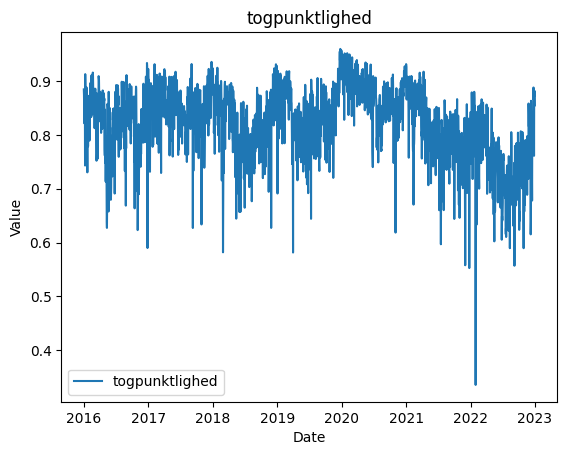

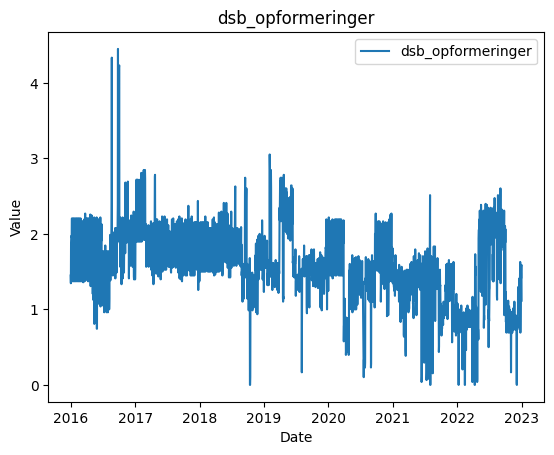

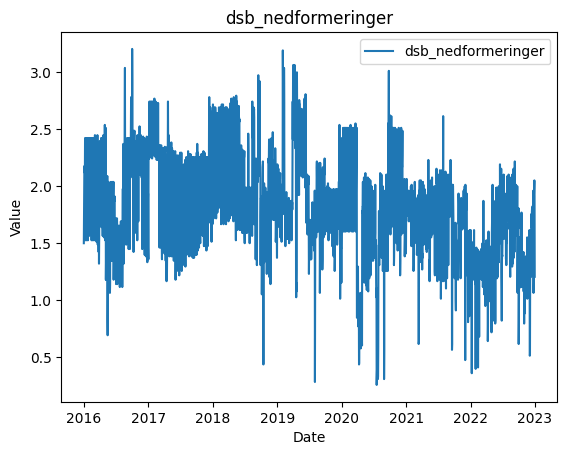

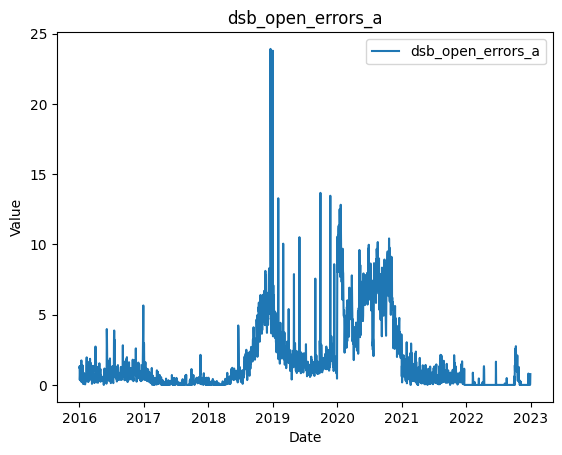

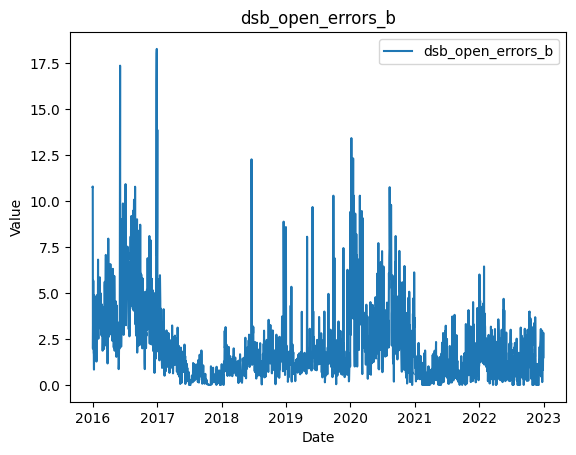

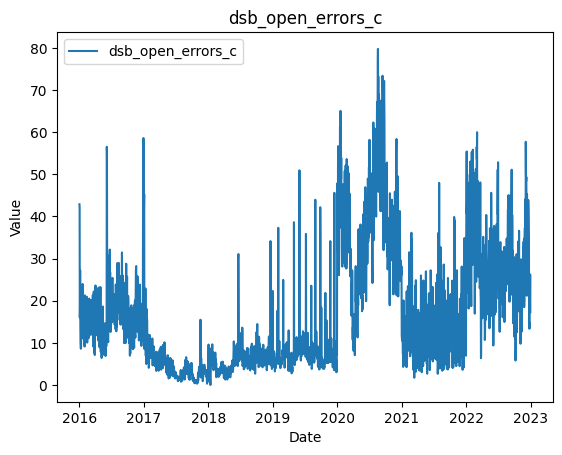

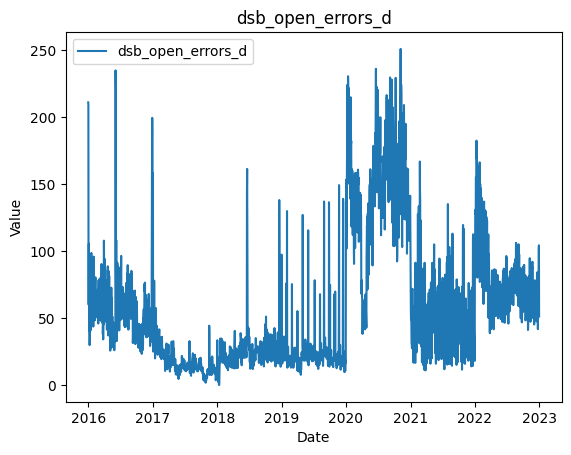

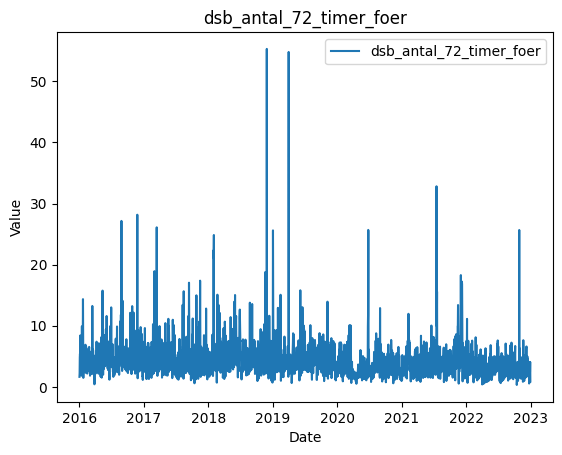

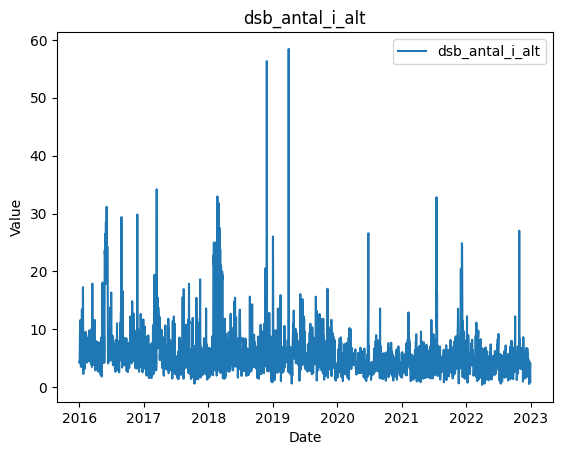

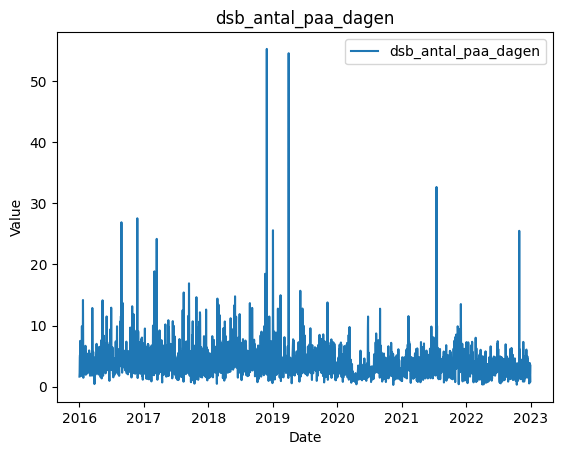

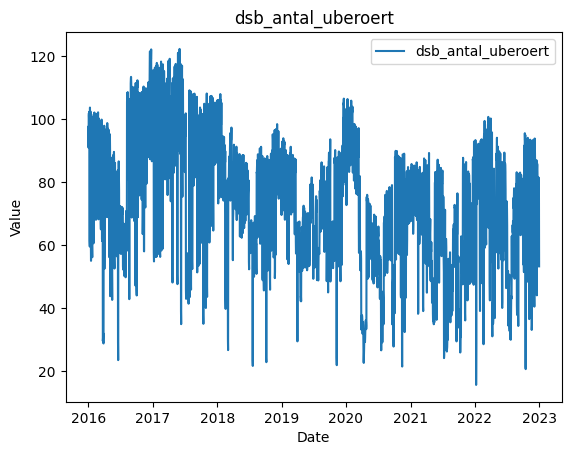

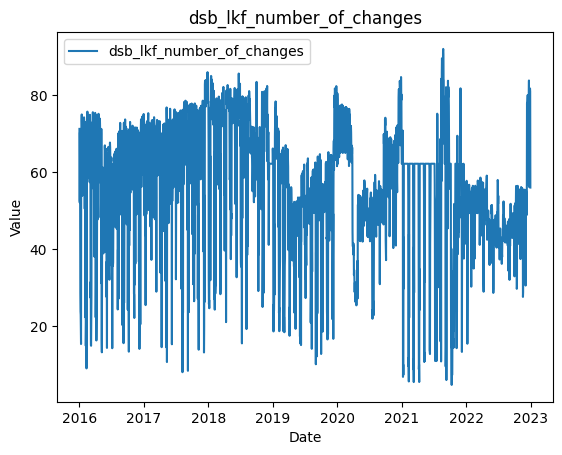

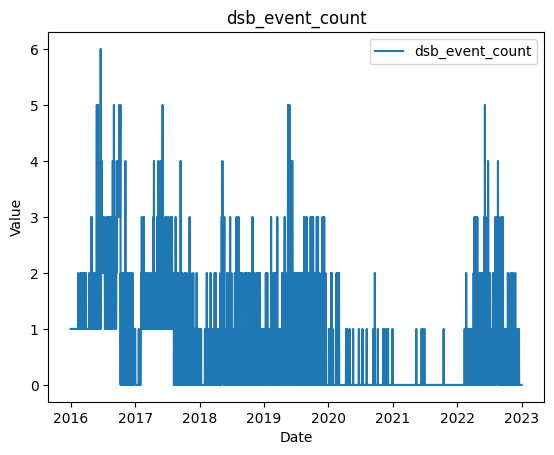

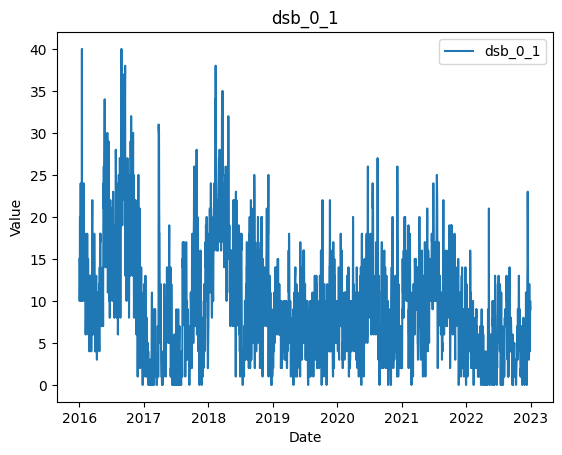

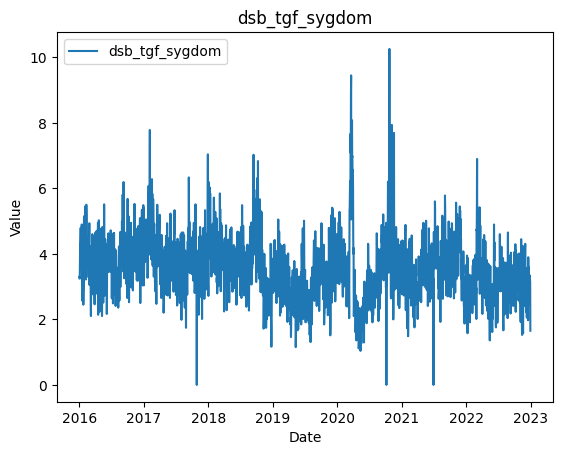

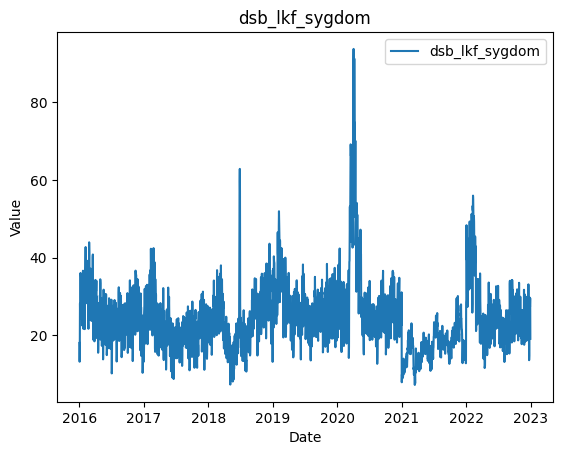

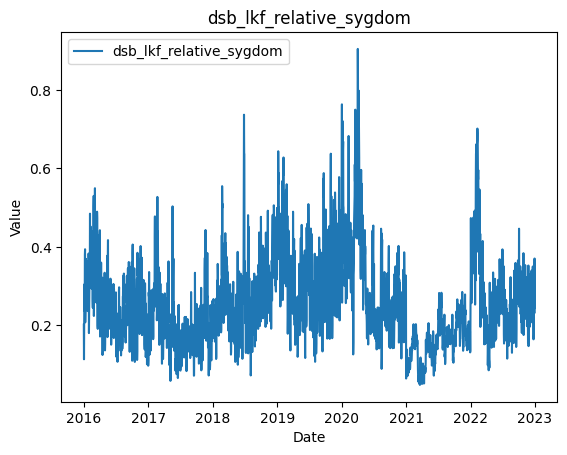

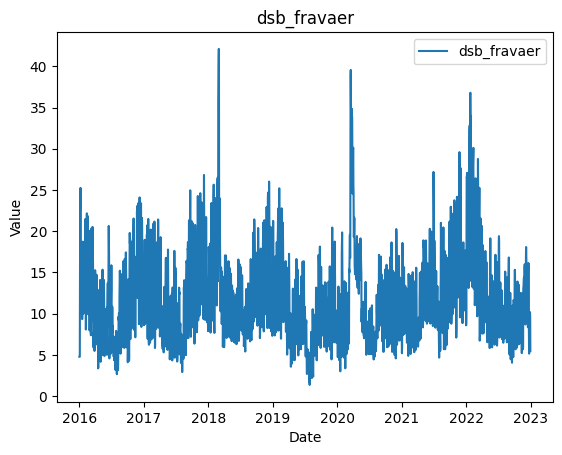

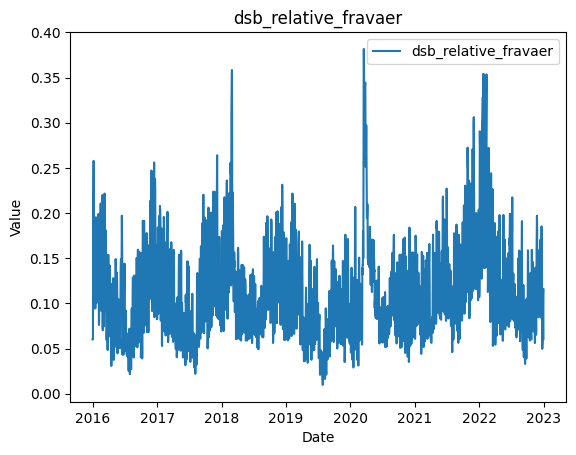

In [18]:
for feature in features_high:
    plotting_trends(feature) #check_seasonality='SEASON_COS' or 'SEASON_SIN'

In [19]:
features_high += ['visualiseringskode']
features_high_data = data[features_high]

In [23]:
kyst = features_high_data[features_high_data['visualiseringskode'] == 20]

In [25]:
kyst.corr()

,togpunktlighed,dsb_opformeringer,dsb_nedformeringer,dsb_open_errors_a,dsb_open_errors_b,dsb_open_errors_c,dsb_open_errors_d,dsb_antal_72_timer_foer,dsb_antal_i_alt,dsb_antal_paa_dagen,dsb_antal_uberoert,dsb_lkf_number_of_changes,dsb_event_count,dsb_0_1,dsb_tgf_sygdom,dsb_lkf_sygdom,dsb_lkf_relative_sygdom,dsb_fravaer,dsb_relative_fravaer,visualiseringskode
togpunktlighed,1.000000,-0.001334,0.113946,0.114390,0.071564,0.176680,0.200391,-0.315586,-0.284701,-0.330153,-0.020387,-0.122674,-0.159564,0.010824,-0.002218,0.190511,0.124058,0.006019,-0.000577,NaN
dsb_opformeringer,-0.001334,1.000000,0.051099,-0.065553,-0.022383,0.025192,-0.012819,-0.032812,-0.044805,-0.038944,-0.013502,-0.041758,0.038113,-0.069052,0.003312,0.121519,0.065968,-0.064808,-0.030507,NaN
dsb_nedformeringer,0.113946,0.051099,1.000000,0.019963,-0.010814,-0.031556,-0.018983,0.080177,0.091495,0.086869,0.082018,0.044526,-0.005338,0.092189,0.021176,0.316106,-0.002263,0.079097,0.051134,NaN
dsb_open_errors_a,0.114390,-0.065553,0.019963,1.000000,0.354863,0.371256,0.419599,-0.033819,-0.050580,-0.031669,0.010272,0.014147,-0.037863,-0.000073,-0.006951,0.049105,0.082693,0.053431,0.023845,NaN
dsb_open_errors_b,0.071564,-0.022383,-0.010814,0.354863,1.000000,0.475650,0.558455,0.020423,0.046450,0.018696,0.089345,0.089401,0.123881,0.183645,0.016842,0.085740,0.146706,0.067247,0.035653,NaN
dsb_open_errors_c,0.176680,0.025192,-0.031556,0.371256,0.475650,1.000000,0.845481,-0.081566,-0.103612,-0.090230,-0.015281,0.039711,-0.173654,-0.080028,0.027377,0.158906,0.281354,0.099323,0.140856,NaN
dsb_open_errors_d,0.200391,-0.012819,-0.018983,0.419599,0.558455,0.845481,1.000000,-0.099637,-0.097714,-0.107106,-0.056906,0.009501,-0.139832,-0.005975,0.033094,0.143463,0.250228,0.116087,0.123239,NaN
dsb_antal_72_timer_foer,-0.315586,-0.032812,0.080177,-0.033819,0.020423,-0.081566,-0.099637,1.000000,0.851402,0.942063,0.134810,0.085694,0.013283,0.197887,0.061271,0.011781,-0.001887,0.197556,0.169353,NaN
dsb_antal_i_alt,-0.284701,-0.044805,0.091495,-0.050580,0.046450,-0.103612,-0.097714,0.851402,1.000000,0.792414,0.119036,0.069421,0.029827,0.300545,0.047686,0.016238,-0.005117,0.230407,0.218332,NaN
dsb_antal_paa_dagen,-0.330153,-0.038944,0.086869,-0.031669,0.018696,-0.090230,-0.107106,0.942063,0.792414,1.000000,0.174222,0.120263,0.031506,0.202645,0.044082,0.007581,-0.007384,0.178271,0.141046,NaN


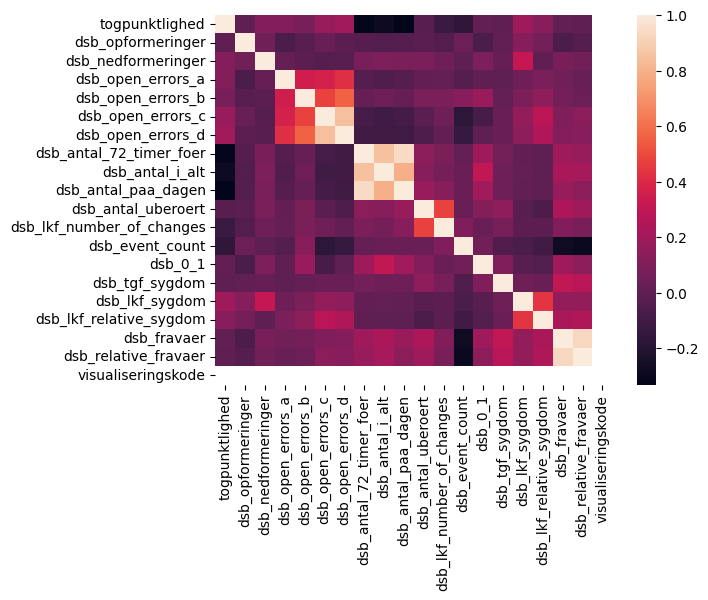

In [24]:
sns.heatmap(kyst.corr(), annot = False)
plt.show()

In [7]:
correlation_df = features_high_data.corr()

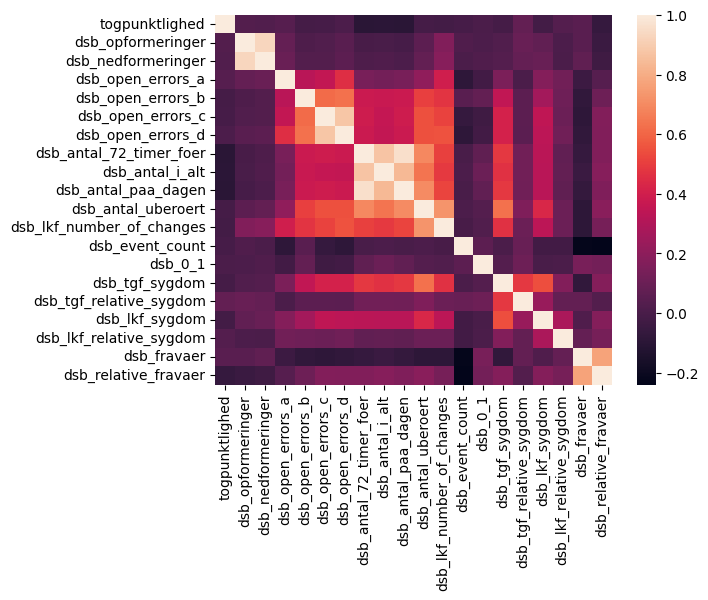

In [8]:
sns.heatmap(correlation_df, annot = False)
plt.show()

<Axes: >

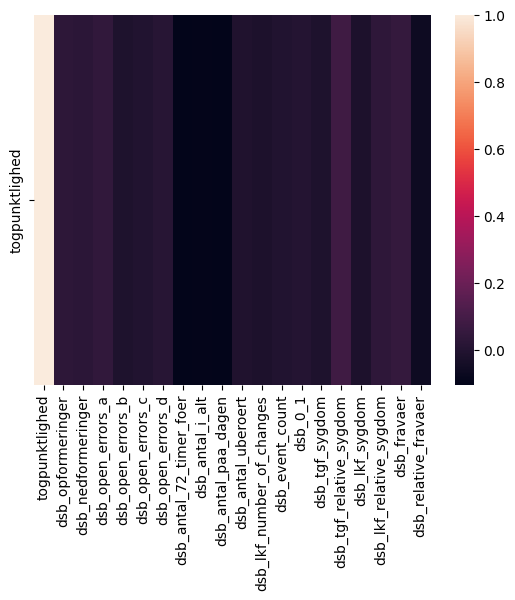

In [9]:
sns.heatmap(correlation_df.loc[['togpunktlighed'],:], annot = False)

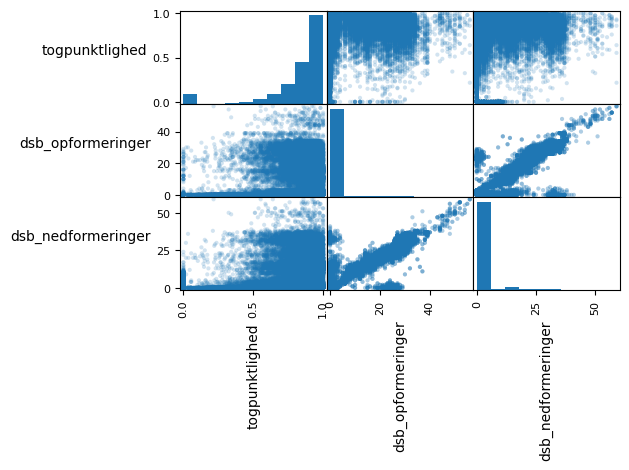

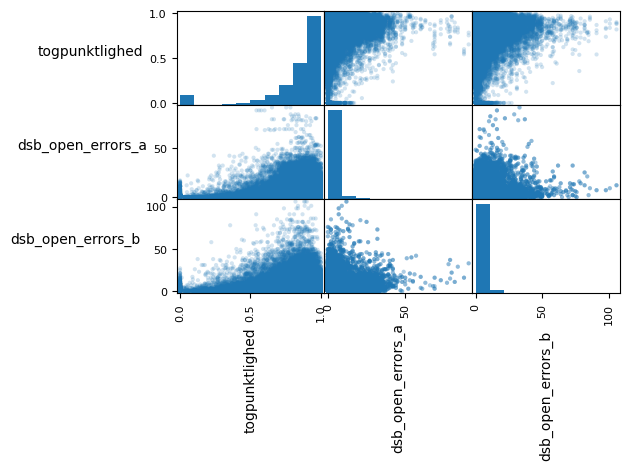

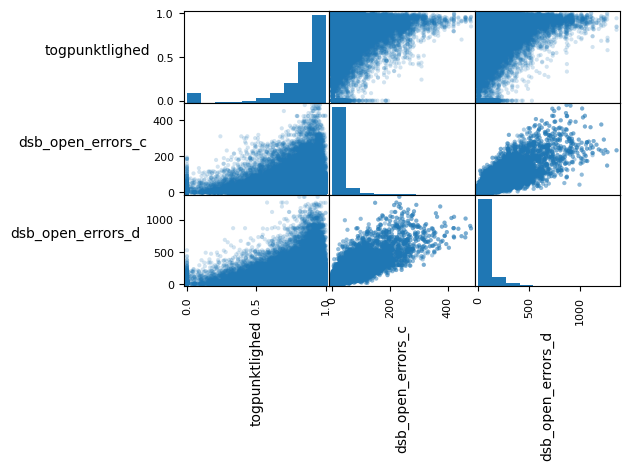

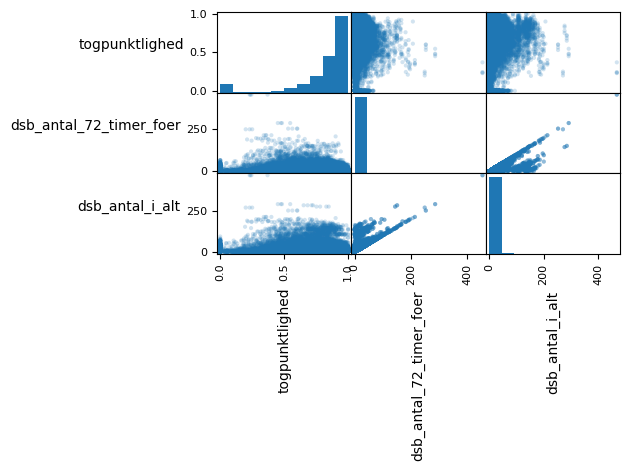

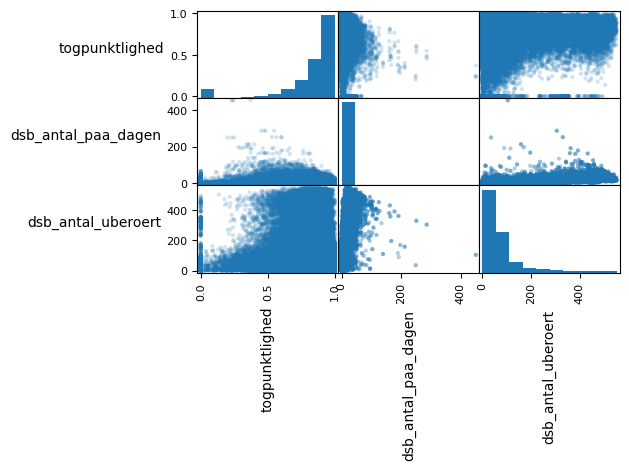

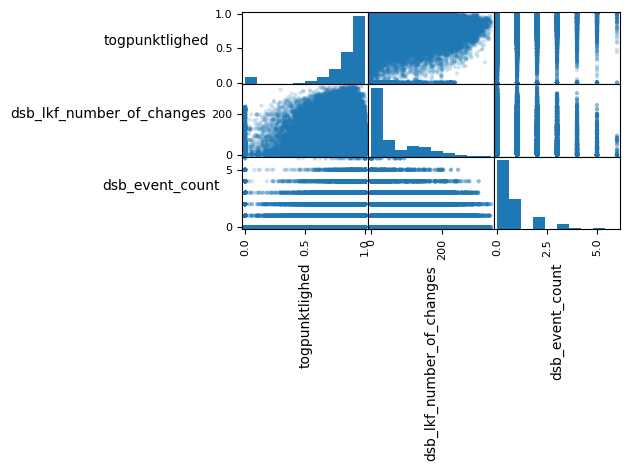

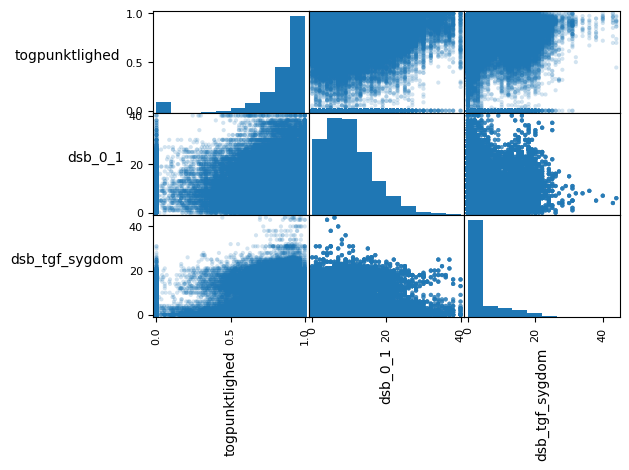

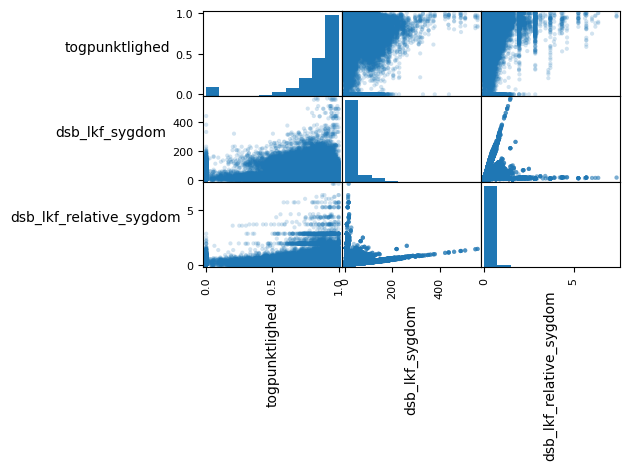

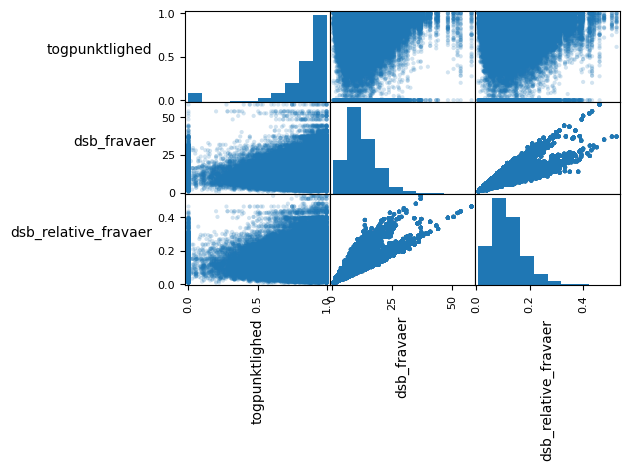

In [84]:
for i in range(0, len(features_high)-1,2):
    axes = pd.plotting.scatter_matrix(data[[features_high[0], features_high[i+1], features_high[i+2]]], alpha=0.2)
    for ax in axes.flatten():
        ax.xaxis.label.set_rotation(90)
        ax.yaxis.label.set_rotation(0)
        ax.yaxis.label.set_ha('right')

    plt.tight_layout()
    plt.gcf().subplots_adjust(wspace=0, hspace=0)
    plt.show()

In [19]:
feature_data

0         0.941
1         0.882
2         0.000
3         0.941
4         0.971
          ...  
199441    0.960
199442    1.000
199443    0.789
199444    0.943
199445    0.904
Name: togpunktlighed, Length: 199446, dtype: float64

In [51]:
def forecast_one_step(model):
    fc, conf_int = model.predict(n_periods=1, return_conf_int=True)
    return (
        fc.tolist()[0],
        np.asarray(conf_int).tolist()[0])

In [52]:
train_pred = {}
for feature_name, _ in features_high_data.items():
    feature_data = data.groupby('dato').mean().reset_index()[feature_name]
    train, test = train, test = train_test_split(feature_data, train_size=0.90, shuffle=False)
    m = pm.auto_arima(train, d=1, seasonal=False, stepwise=True,
                     suppress_warnings=True, error_action="ignore", max_p=6,
                     max_order=None, trace=True)
    pred = []

    for new_ob in test:
        fc, conf = forecast_one_step(m)
        pred.append(fc)        
        # Updates the existing model with a small number of MLE steps
        m.update(new_ob)
    train_pred[feature_name] = (test, pred)
    

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-7980.794, Time=0.60 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-7317.645, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-7534.685, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-7820.902, Time=0.25 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-7319.643, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-7980.003, Time=0.64 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-7979.869, Time=0.57 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-7978.972, Time=1.14 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-7973.161, Time=0.94 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-7981.517, Time=0.48 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-7969.130, Time=0.37 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-7705.278, Time=0.08 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-7983.443, Time=0.14 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-7822.878, Time=0.09 sec
 ARIMA(1,1,0)(0,0,0

In [36]:
test

2301    0.760769
2302    0.693013
2303    0.755667
2304    0.759744
2305    0.777359
          ...   
2552    0.761090
2553    0.880731
2554    0.872359
2555    0.881462
2556    0.854564
Name: togpunktlighed, Length: 256, dtype: float64

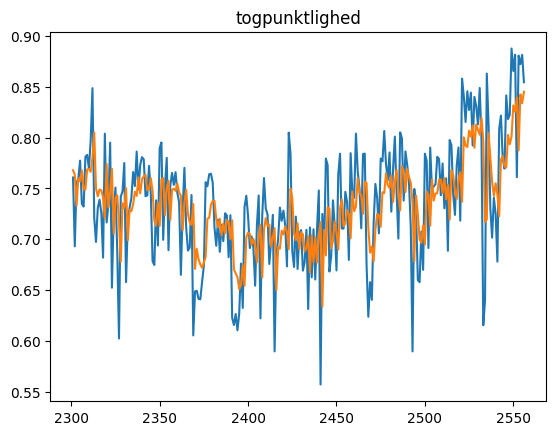

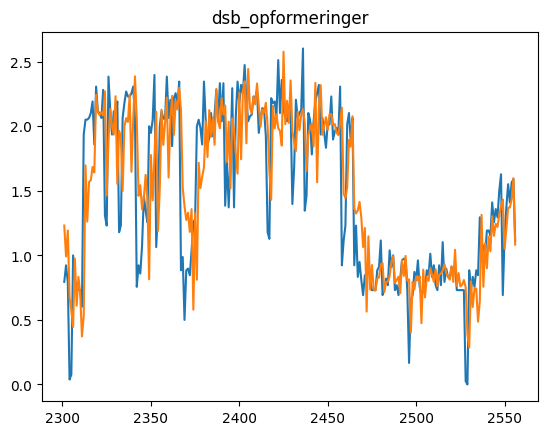

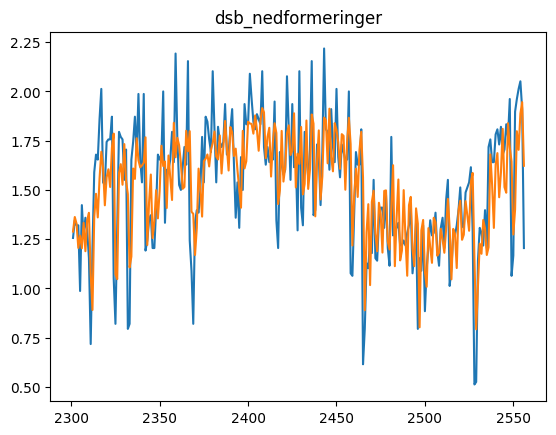

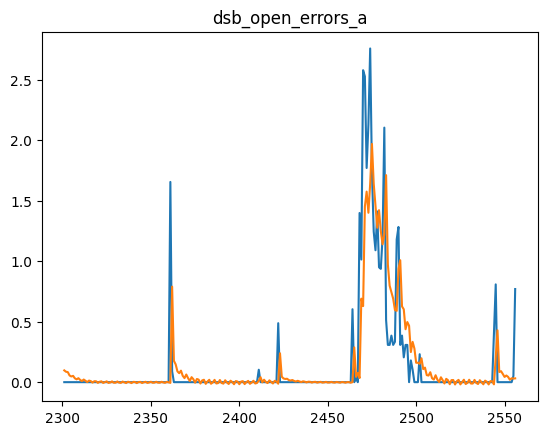

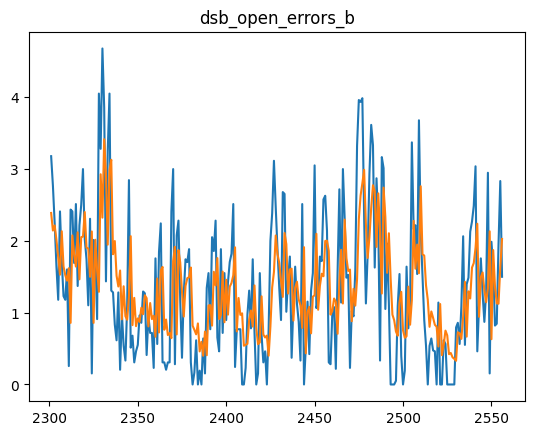

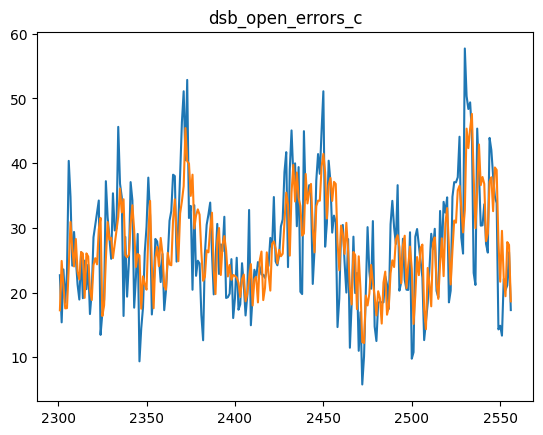

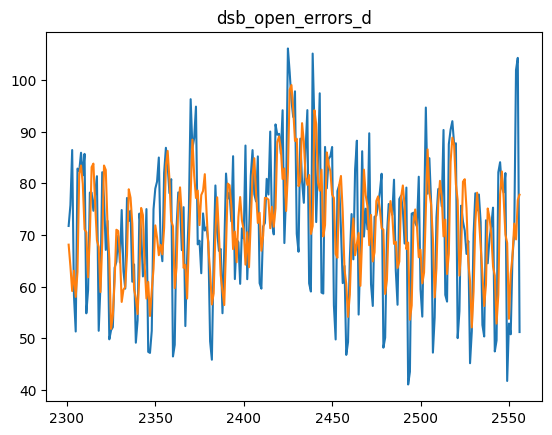

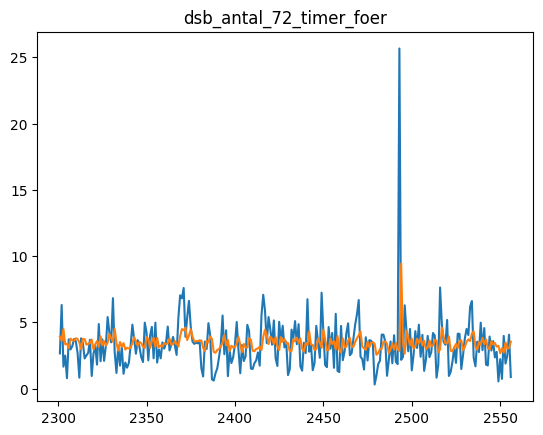

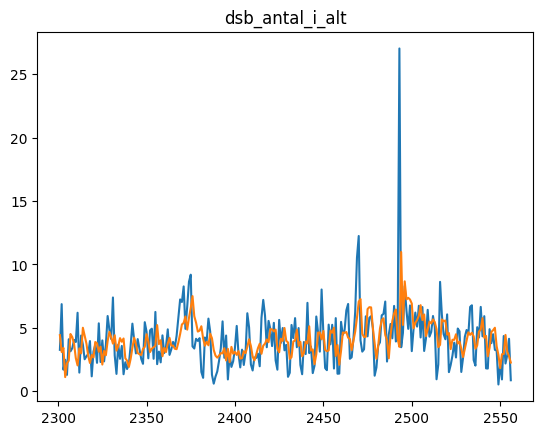

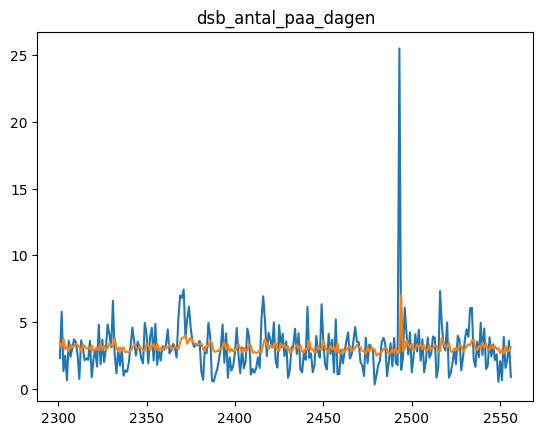

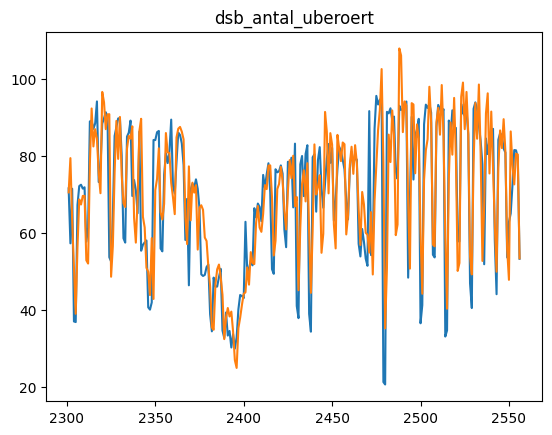

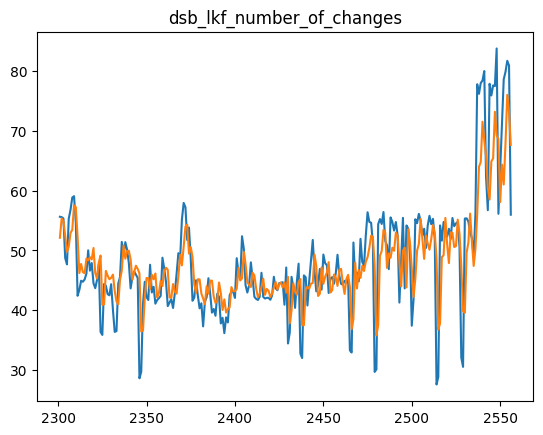

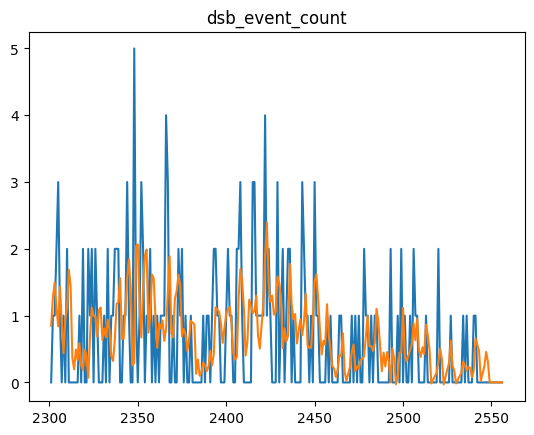

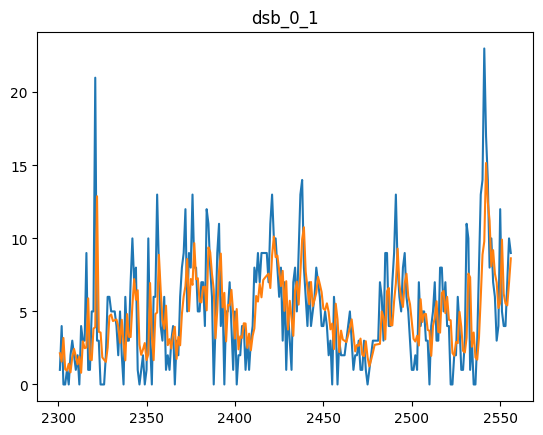

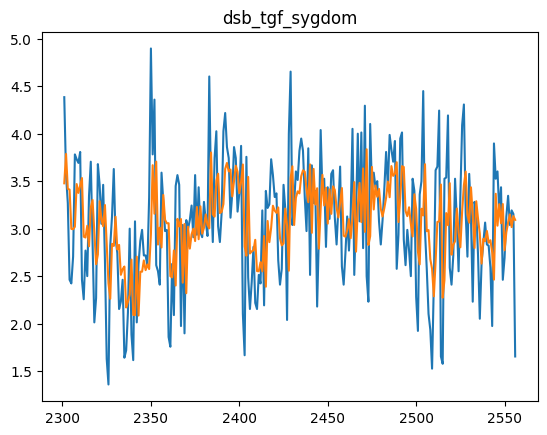

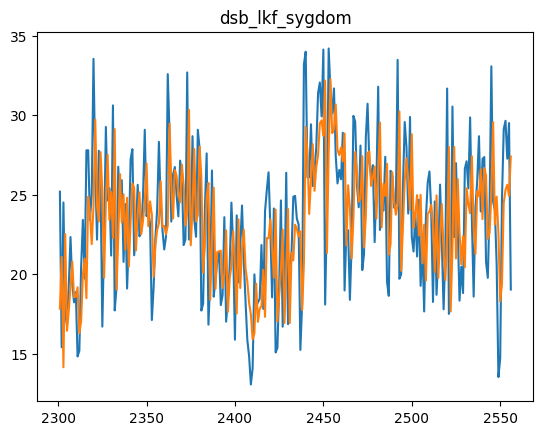

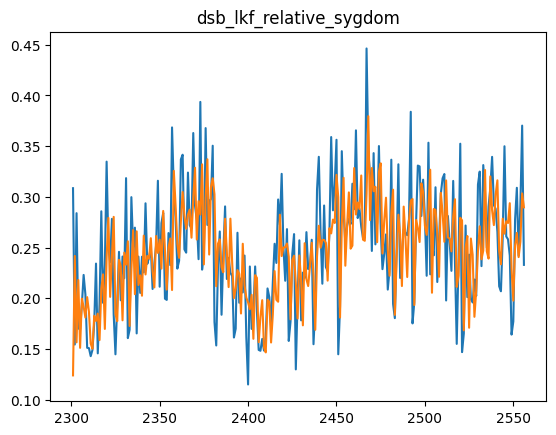

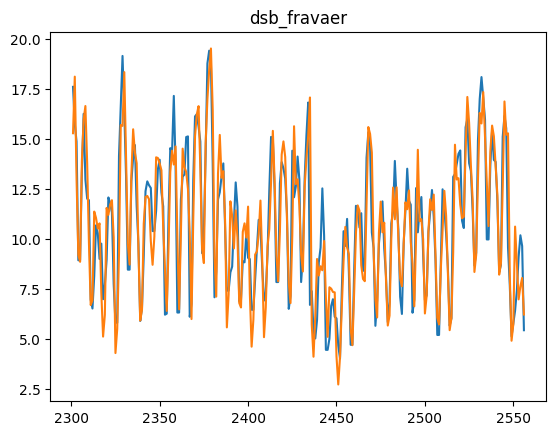

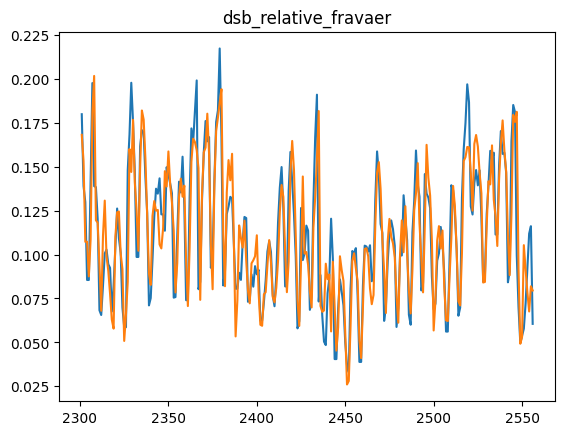

In [53]:
for feature_name, (test, pred) in train_pred.items():
    plt.plot(test.index, test)
    plt.plot(test.index, pred)
    plt.title(feature_name)
    plt.show()